In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace
# from scipy.ndimage import filters.laplace

import sys
sys.path.append('../')

from pathlib import Path
colour = Path('../GTA_images/Simple/Colour')
depth = Path('../GTA_images/Simple/Depth')

from depth_Functions import (
    import_raw_colour_image, 
    import_raw_depth_image,
    show_img, 
    show_array_of_images
)
    
from Feature_Extraction import (
    get_patchsize,
    process_patches, 
    create_local_feature_vector
)

from Equations import (
    symbol,
    equation
)

from Global_Depth import (
    get_absolute_and_relative_depth,
    get_absolute_depth,
    get_relative_histograms,
    subtract_adjacent
)

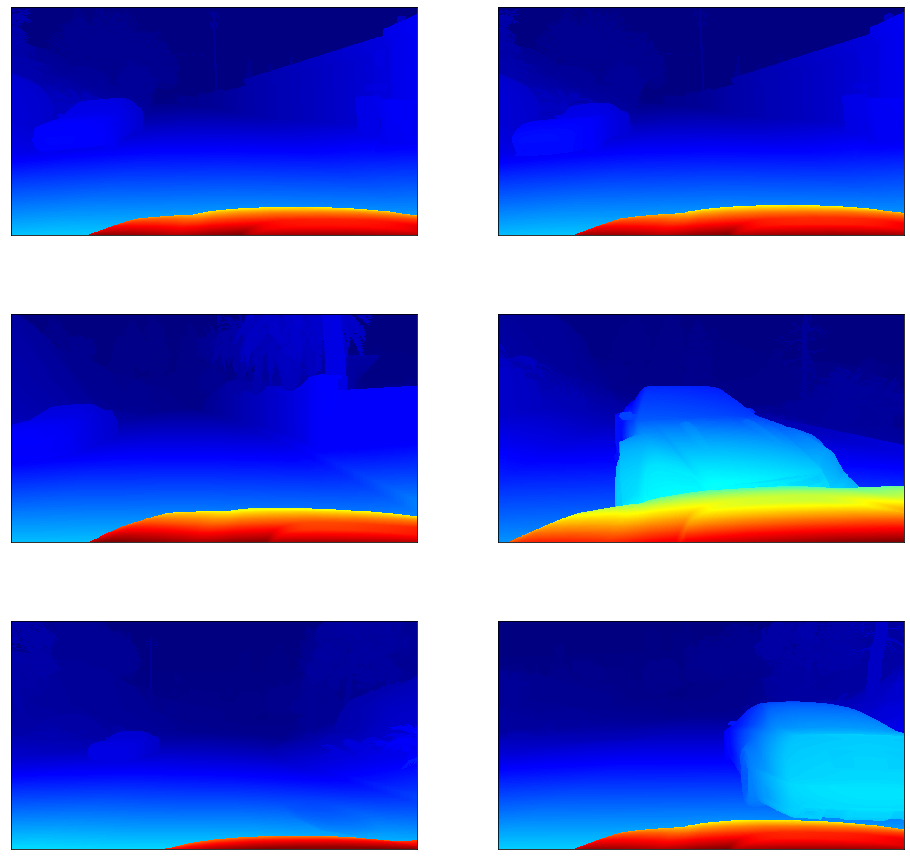

In [2]:
depth_images = [import_raw_depth_image(str(file)) for file in sorted(depth.iterdir())]

show_array_of_images(depth_images, depthmap=True)

# Absolute Depth

In [545]:
depths_6x8 = [process_patches(depth_images[i], 6, function=lambda patch : np.mean(patch)) for i in range(len(depth_images))]

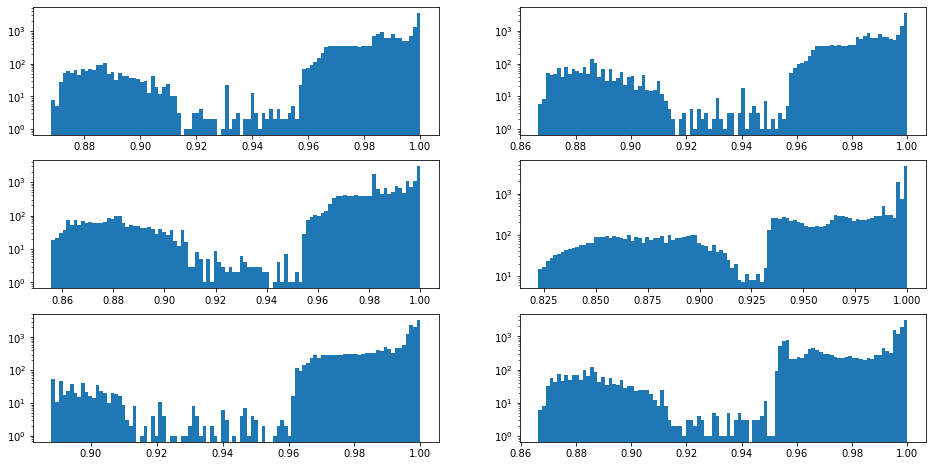

In [546]:
_, axis = plt.subplots(3,2,figsize=(16,8))

for i in range(len(depths_6x8)):
    axis[int(i/2)][i%2].hist(depths_6x8[i].flatten(), bins=100)
    axis[int(i/2)][i%2].set_yscale('log')
#     axis[int(i/2)][i%2].plot(laplace.fit(depths_6x8[i].flatten()))

pass;

# Relative Depth

In [148]:
relative_depths_6x8 = [process_patches(depths, 6, function=lambda patch : [np.mean(patch)]+[0 for i in range(4)]) for depths in depth_images]
relative_depths_6x8 = [subtract_adjacent(depth) for depth in relative_depths_6x8]

In [149]:
relative_depths_6x8[0].shape

(120, 160, 4)

In [150]:
relative_depths_6x8[0][0][0][0]

0.0

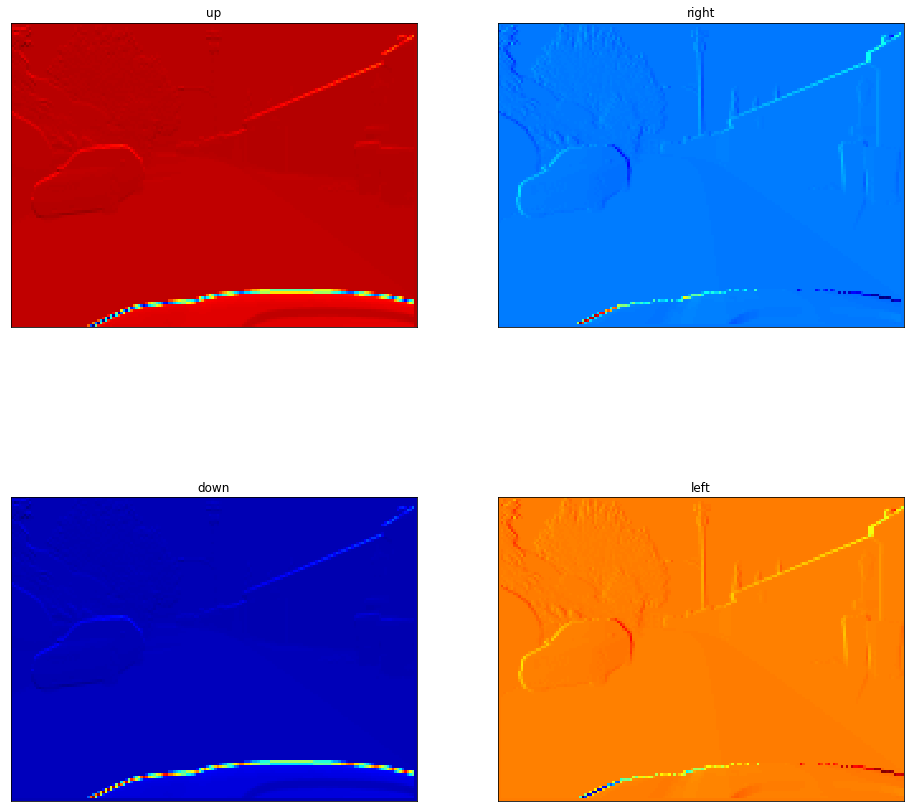

In [216]:
show_array_of_images([relative_depths_6x8[0][:,:,i] for i in range(4)], (2,2), 
                     heatmap=True, titles=['up', 'right', 'down', 'left'])

In [471]:
relative_histogram = np.histogram(relative_depths_6x8[0].flatten(), bins=101)

In [519]:
relative_histogram[0].shape
relative_histogram[1].shape

(101,)

(102,)

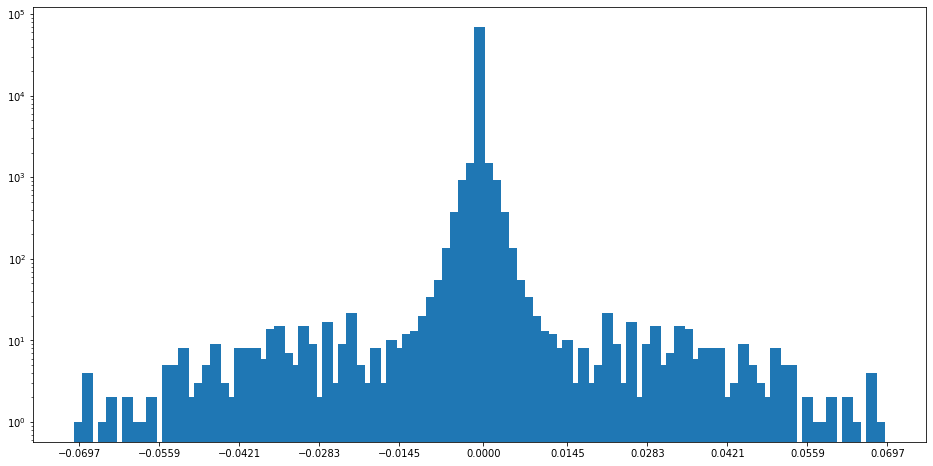

In [520]:
_, axis = plt.subplots(1,1, figsize=(16,8))

axis.bar(relative_histogram[1][:-1],relative_histogram[0],width=0.002)
axis.set_yscale('log')
axis.set_xticks(list(relative_histogram[1][:50:10])+[0]+list(relative_histogram[1][61::10]))
# axis.plot(relative_histogram[1][:-1], laplace.pdf(relative_histogram[1][:-1], loc=0, scale=1), 'r')
# axis.scatter(relative_histogram[1][:-1], relative_histogram[0])
# axis.set_ylim([1,10**5])
pass;

In [538]:
focused_histogram = np.histogram(relative_depths_6x8[0][abs(relative_depths_6x8[0])<0.005].flatten(), bins=101)

In [539]:
list(focused_histogram[1][:50:10])+[0]+list(focused_histogram[1][61::10])

[-0.004990875720977783,
 -0.004002583499001984,
 -0.003014291277026186,
 -0.0020259990550503875,
 -0.0010377068330745887,
 0,
 0.0010377068330745878,
 0.0020259990550503867,
 0.0030142912770261855,
 0.004002583499001984,
 0.004990875720977783]

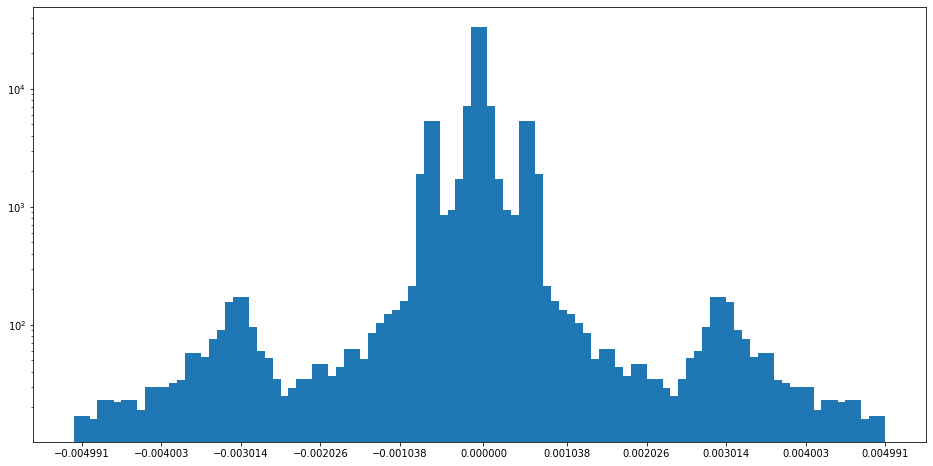

In [544]:
_, axis = plt.subplots(1,1, figsize=(16,8))

axis.bar(focused_histogram[1][:-1],focused_histogram[0],width=0.0002)
axis.set_yscale('log')
axis.set_xticks(list(focused_histogram[1][:50:10])+[0]+list(focused_histogram[1][61::10]))
# axis.plot(relative_histogram[1][:-1], laplace.pdf(relative_histogram[1][:-1], loc=0, scale=1), 'r')
# axis.scatter(relative_histogram[1][:-1], relative_histogram[0])
# axis.set_ylim([1,10**5])
pass;